In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


In [107]:
data = pd.read_excel(io='./data4.xlsx', sheet_name=None)

C:\Users\yaojie\anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [108]:
for i in data:
    print(i)

销售收入
广告支出


In [109]:
xiaoshoushouru = data['销售收入']
guanggaozhichu = data['广告支出']

In [110]:
guanggaozhichu['投放月份'] = [int(i.split('-')[1]) for i in list(guanggaozhichu['投放日期'])]
guanggaozhichu['投放季度'] = [int((i - 1) / 3) + 1 for i in list(guanggaozhichu['投放月份'])]

In [111]:
guanggaozhichu = guanggaozhichu.drop('序号', axis=1)
guanggaozhichu = guanggaozhichu.drop('交易类型', axis=1)
guanggaozhichu = guanggaozhichu.drop('投放日期', axis=1)

In [112]:
guanggaozhichu

,支出,投放月份,投放季度
0,359.44,1,1
1,383.73,1,1
2,446.93,1,1
3,368.78,1,1
4,477.38,1,1
...,...,...,...
176,2698.75,6,2
177,2159.02,6,2
178,1640.29,6,2
179,1835.43,6,2


In [113]:
xiaoshoushouru['业务月份'] = [int(i.split('-')[1]) for i in list(xiaoshoushouru['业务日期'])]
xiaoshoushouru['业务季度'] = [int((i - 1) / 3) + 1 for i in list(xiaoshoushouru['业务月份'])]

In [114]:
xiaoshoushouru = xiaoshoushouru.drop('单据类型', axis=1)
xiaoshoushouru = xiaoshoushouru.drop('单据编号', axis=1)
xiaoshoushouru = xiaoshoushouru.drop('合同主体', axis=1)
xiaoshoushouru = xiaoshoushouru.drop('售后退货单号', axis=1)
xiaoshoushouru = xiaoshoushouru.drop('商品名称', axis=1)
xiaoshoushouru = xiaoshoushouru.drop('订单号', axis=1)
xiaoshoushouru = xiaoshoushouru.drop('采购单号', axis=1)
xiaoshoushouru = xiaoshoushouru.drop('采购员/销售员', axis=1)
xiaoshoushouru = xiaoshoushouru.drop('sku编号', axis=1)
xiaoshoushouru = xiaoshoushouru.drop('sku数量', axis=1)
xiaoshoushouru = xiaoshoushouru.drop('业务日期', axis=1)

In [115]:
xiaoshoushouru

,金额,业务月份,业务季度
0,46.28,3,1
1,29.90,3,1
2,40.48,3,1
3,92.56,3,1
4,40.48,3,1
...,...,...,...
24536,46.28,2,1
24537,40.48,2,1
24538,46.28,2,1
24539,40.48,2,1


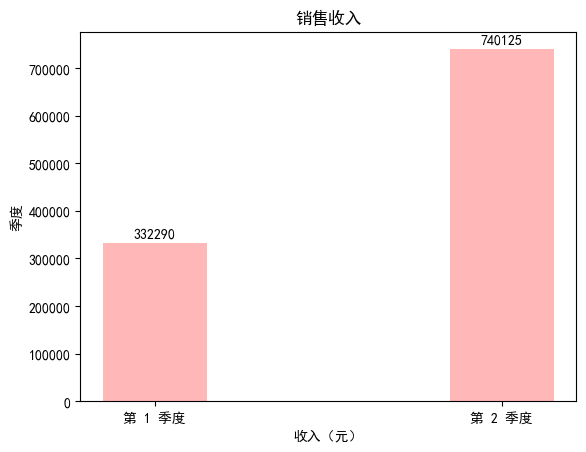

In [116]:
bar1 = plt.bar(np.arange(0, len(xiaoshoushouru.groupby('业务季度')['金额'].sum())),
               xiaoshoushouru.groupby('业务季度')['金额'].sum(), align='center', width=0.3, alpha=0.7, color='#ff9999',
               tick_label=["第 %d 季度" % (i) for i in sorted(list(set(xiaoshoushouru['业务季度'])))])

plt.bar_label(bar1, padding=3)

#展示结果
plt.title('销售收入')
plt.xlabel('收入（元）')
plt.ylabel('季度')
plt.show()

In [117]:
zhichu = guanggaozhichu.groupby('投放月份')['支出'].sum()
zhichu

投放月份
1    13985.51
2     6265.78
3    12116.45
4    15832.77
5    18064.53
6    57013.59
Name: 支出, dtype: float64

In [118]:
shouru = xiaoshoushouru.groupby('业务月份')['金额'].sum()
shouru

业务月份
1      5641.40
2    116830.00
3    209818.38
4    194799.94
5    184986.74
6    360338.74
Name: 金额, dtype: float64

In [119]:
X = pd.concat([zhichu], axis=1)
Y = shouru

In [120]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2)

In [121]:
reg = LR().fit(Xtrain, Ytrain)

In [122]:
yhat = reg.predict(Xtest)
yhat

array([107768.51985308, 140624.3359211 ])

In [123]:
print(list(zip(X.columns, reg.coef_)))

[('支出', 5.523768353489053)]


In [124]:
print(reg.intercept_)

40840.056786450004


In [125]:
reg.coef_ * 78000 + reg.intercept_

array([471693.9883586])

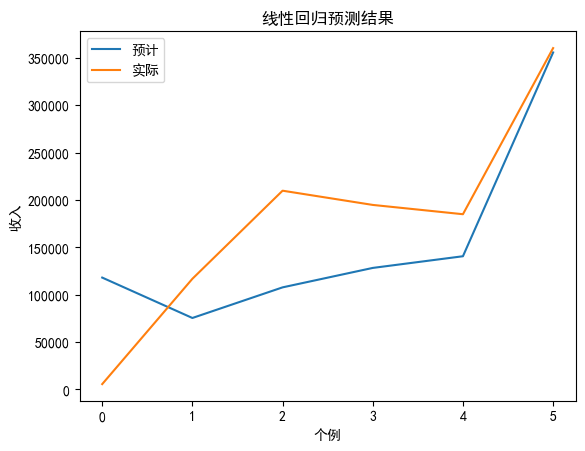

In [126]:
plt.plot(range(len(shouru)), [reg.coef_ * i + reg.intercept_ for i in list(zhichu)])
plt.plot(range(len(shouru)), shouru)

plt.xlabel('个例')
plt.ylabel('收入')
plt.title('线性回归预测结果')
plt.legend(['预计', '实际'])